# **Hey!!!**
Searching for something interesting on Kaggle I suddenly ran into this DataSet:<br>
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud <br>
It seems to be interesting as we have:<br>
- Extreme class Imbalance
- 285 000 samples (150mb) <br>
And unknown features extracted with PCA

**Let's Gooo!!!!**<br>
<img src="https://media.tenor.com/rwXThjsOV38AAAAi/peepo-scam.gif">

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

Time    V1    V2   V3    V4    V5    V6    V7    V8    V9  ...   V21   V22  \
0  0.00 -1.36 -0.07 2.54  1.38 -0.34  0.46  0.24  0.10  0.36  ... -0.02  0.28   
1  0.00  1.19  0.27 0.17  0.45  0.06 -0.08 -0.08  0.09 -0.26  ... -0.23 -0.64   
2  1.00 -1.36 -1.34 1.77  0.38 -0.50  1.80  0.79  0.25 -1.51  ...  0.25  0.77   
3  1.00 -0.97 -0.19 1.79 -0.86 -0.01  1.25  0.24  0.38 -1.39  ... -0.11  0.01   
4  2.00 -1.16  0.88 1.55  0.40 -0.41  0.10  0.59 -0.27  0.82  ... -0.01  0.80   

    V23   V24   V25   V26   V27   V28  Amount  Class  
0 -0.11  0.07  0.13 -0.19  0.13 -0.02  149.62      0  
1  0.10 -0.34  0.17  0.13 -0.01  0.01    2.69      0  
2  0.91 -0.69 -0.33 -0.14 -0.06 -0.06  378.66      0  
3 -0.19 -1.18  0.65 -0.22  0.06  0.06  123.50      0  
4 -0.14  0.14 -0.21  0.50  0.22  0.22   69.99      0  

[5 rows x 31 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

No NaN, no problem.

In [ ]:
df.describe()

Time        V1        V2        V3        V4        V5        V6  \
count 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00   
mean   94813.86      0.00      0.00     -0.00      0.00      0.00      0.00   
std    47488.15      1.96      1.65      1.52      1.42      1.38      1.33   
min        0.00    -56.41    -72.72    -48.33     -5.68   -113.74    -26.16   
25%    54201.50     -0.92     -0.60     -0.89     -0.85     -0.69     -0.77   
50%    84692.00      0.02      0.07      0.18     -0.02     -0.05     -0.27   
75%   139320.50      1.32      0.80      1.03      0.74      0.61      0.40   
max   172792.00      2.45     22.06      9.38     16.88     34.80     73.30   

             V7        V8        V9  ...       V21       V22       V23  \
count 284807.00 284807.00 284807.00  ... 284807.00 284807.00 284807.00   
mean      -0.00      0.00     -0.00  ...      0.00     -0.00      0.00   
std        1.24      1.19      1.10  ...      0.73      0.73      0.62   
min      -43.56    -73.22    -13.43  ...    -34.83    -10.93    -44.81   
25%       -0.55     -0.21     -0.64  ...     -0.23     -0.54     -0.16   
50%        0.04      0.02     -0.05  ...     -0.03      0.01     -0.01   
75%        0.57      0.33      0.60  ...      0.19      0.53      0.15   
max      120.59     20.01     15.59  ...     27.20     10.50     22.53   

            V24       V25       V26       V27       V28    Amount     Class  
count 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00  
mean       0.00      0.00      0.00     -0.00     -0.00     88.35      0.00  
std        0.61      0.52      0.48      0.40      0.33    250.12      0.04  
min       -2.84    -10.30     -2.60    -22.57    -15.43      0.00      0.00  
25%       -0.35     -0.32     -0.33     -0.07     -0.05      5.60      0.00  
50%        0.04      0.02     -0.05      0.00      0.01     22.00      0.00  
75%        0.44      0.35      0.24      0.09      0.08     77.16      0.00  
max        4.58      7.52      3.52     31.61     33.85  25691.16      1.00  

[8 rows x 31 columns]

Yoo... Do you see this? 0.001727 is a mean value for class feature

In [ ]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

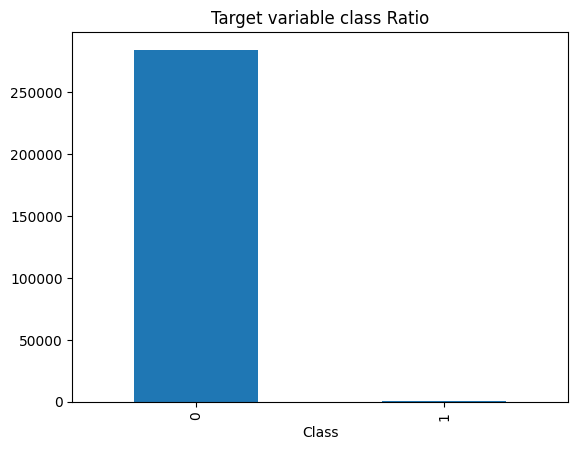

In [ ]:
plt.title("Target variable class Ratio")
df["Class"].value_counts().plot(kind="bar");

We don't panic... Everything is okay as long as we have imblearn!

In [ ]:
correlations_data = df.corr()

print("Most correlated features: ")
print(correlations_data["Class"].sort_values(ascending=False))

Most correlated features: 
Class     1.00
V11       0.15
V4        0.13
V2        0.09
V21       0.04
V19       0.03
V20       0.02
V8        0.02
V27       0.02
V28       0.01
Amount    0.01
V26       0.00
V25       0.00
V22       0.00
V23      -0.00
V15      -0.00
V13      -0.00
V24      -0.01
Time     -0.01
V6       -0.04
V5       -0.09
V9       -0.10
V1       -0.10
V18      -0.11
V7       -0.19
V3       -0.19
V16      -0.20
V10      -0.22
V12      -0.26
V14      -0.30
V17      -0.33
Name: Class, dtype: float64


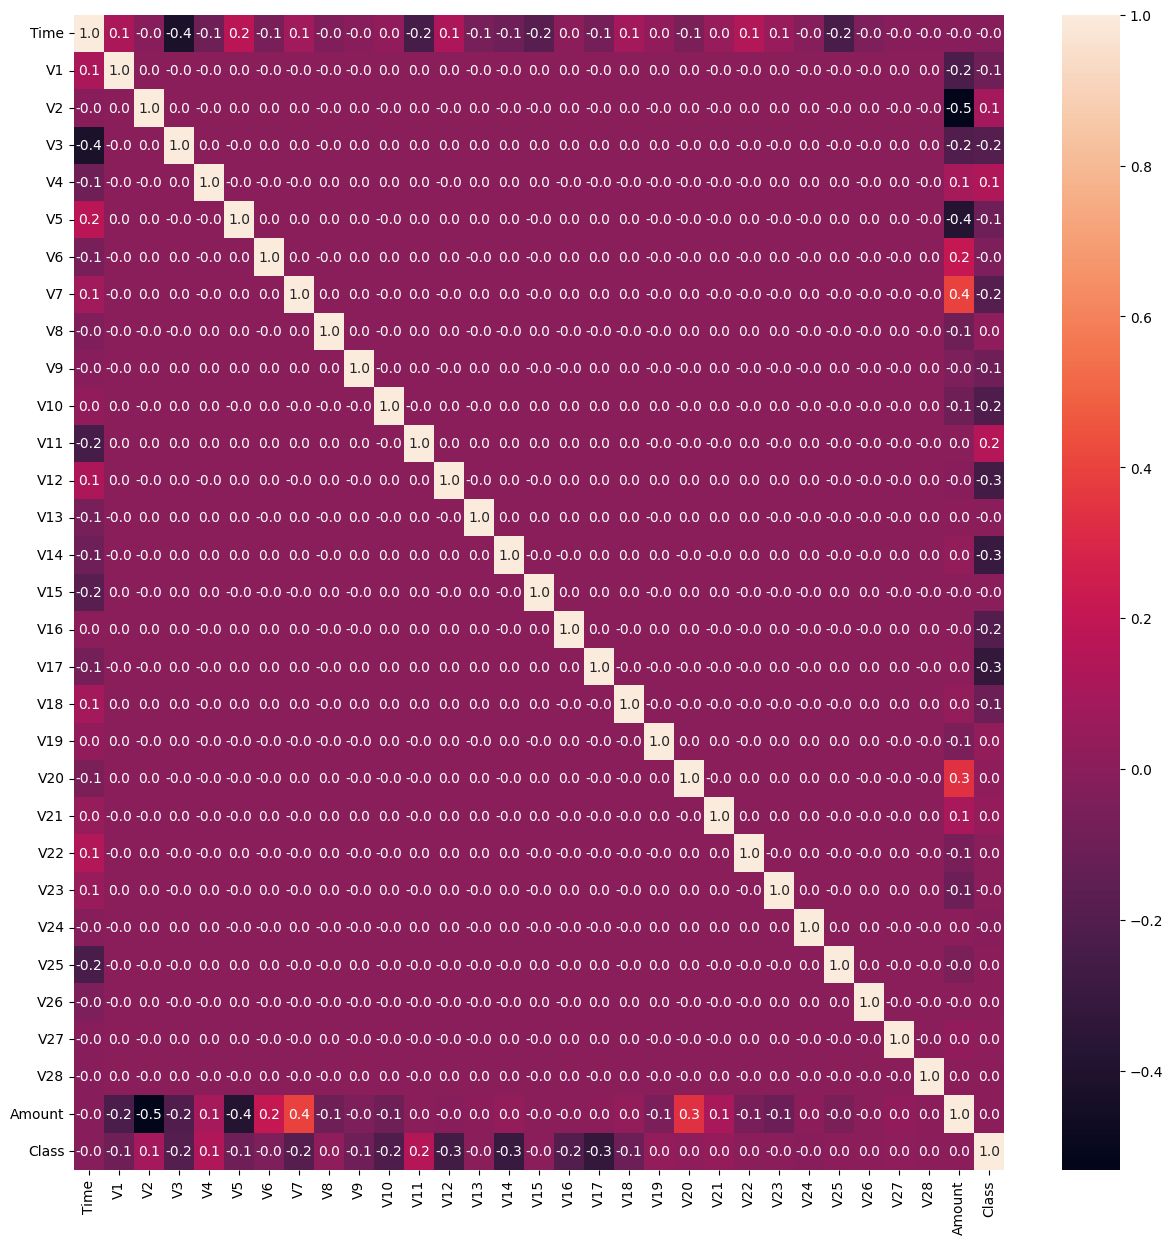

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlations_data, annot=True, fmt=".1f");

Let's drop some weird features with low abs(coreelation)

In [ ]:
for col in df.columns:
    # picked 5 percent, cause there's a pretty big (and important I guess) jump in correlation
    # from 0.04 to 0.09
    if abs(correlations_data["Class"][col]) < 0.05:
        df.drop(col, axis=1, inplace=True)

df.shape

(284807, 15)

Uh, Oh... We droped 16 columns. I'm not sure whether it's right decision, but... We'll see

Let's explore our useful data with plotting now!

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [ ]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [ ]:
rus = RandomUnderSampler()
smote = SMOTE(sampling_strategy={1: 2_000})

In [ ]:
X_smt, y_smt = smote.fit_resample(X, y)

In [ ]:
X_final, y_final = rus.fit_resample(X_smt, y_smt)

In [ ]:
X_final.shape, y_final.shape

((4000, 14), (4000,))

In [ ]:
X_final[:5]

V1    V2    V3    V4    V5    V7    V9   V10  V11   V12   V14   V16  \
183220  1.95 -0.56 -0.40  0.33 -0.64 -0.79  1.39  0.03 0.23  0.51  0.19  0.38   
230522  0.12  0.91 -0.58 -0.75  1.14  0.81 -0.18 -0.65 0.51  0.09 -0.72  0.69   
156434  1.88 -0.62  0.87  0.82 -1.82 -1.30  3.02 -0.36 0.57 -2.64  1.29  0.59   
173019  1.59 -2.00 -1.14 -0.80 -0.96 -0.69  0.04  0.70 0.17 -0.32 -0.10  1.38   
15858  -1.02  0.30  1.69  0.16  0.27  1.43 -0.32 -0.62 0.49 -0.15  0.20 -0.27   

         V17   V18  
183220 -0.78  0.86  
230522 -0.01  0.50  
156434  0.42  0.49  
173019 -0.02 -0.97  
15858  -0.34 -0.06

In [ ]:
df_og = df.copy()

In [ ]:
df = pd.merge(X_final, y_final, left_index=True, right_index=True)
df.head()

V1    V2    V3    V4    V5    V7    V9   V10  V11   V12   V14   V16  \
183220  1.95 -0.56 -0.40  0.33 -0.64 -0.79  1.39  0.03 0.23  0.51  0.19  0.38   
230522  0.12  0.91 -0.58 -0.75  1.14  0.81 -0.18 -0.65 0.51  0.09 -0.72  0.69   
156434  1.88 -0.62  0.87  0.82 -1.82 -1.30  3.02 -0.36 0.57 -2.64  1.29  0.59   
173019  1.59 -2.00 -1.14 -0.80 -0.96 -0.69  0.04  0.70 0.17 -0.32 -0.10  1.38   
15858  -1.02  0.30  1.69  0.16  0.27  1.43 -0.32 -0.62 0.49 -0.15  0.20 -0.27   

         V17   V18  Class  
183220 -0.78  0.86      0  
230522 -0.01  0.50      0  
156434  0.42  0.49      0  
173019 -0.02 -0.97      0  
15858  -0.34 -0.06      0

<Figure size 640x480 with 0 Axes>

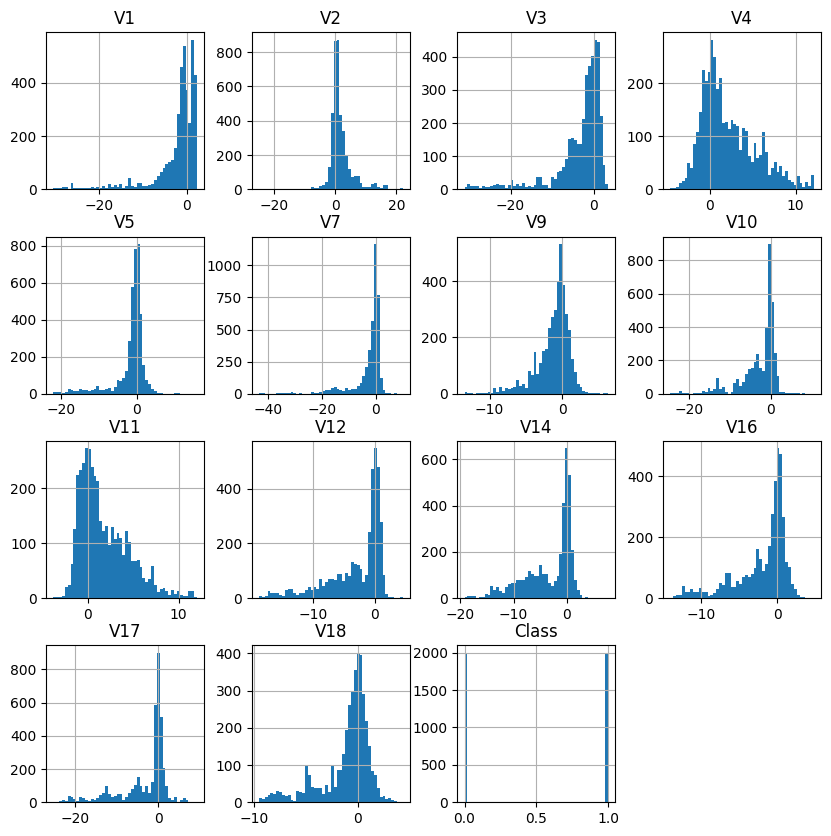

In [ ]:
plt.subplots_adjust(hspace=2);
df.hist(bins=50, rwidth=1, figsize=(10, 10));

<Axes: xlabel='Class'>

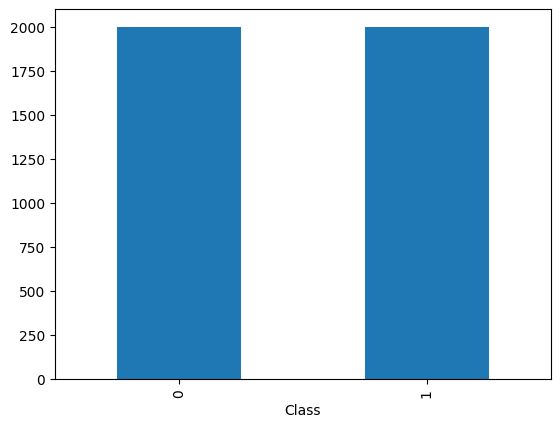

In [ ]:
df["Class"].value_counts().plot(kind="bar")

I don't think that dropping that much samples is good, so I tried to keep dataset a bit bigger.
We lost a lot of data, so let's see if it's critical or not

In [ ]:
import warnings

warnings.filterwarnings('ignore')

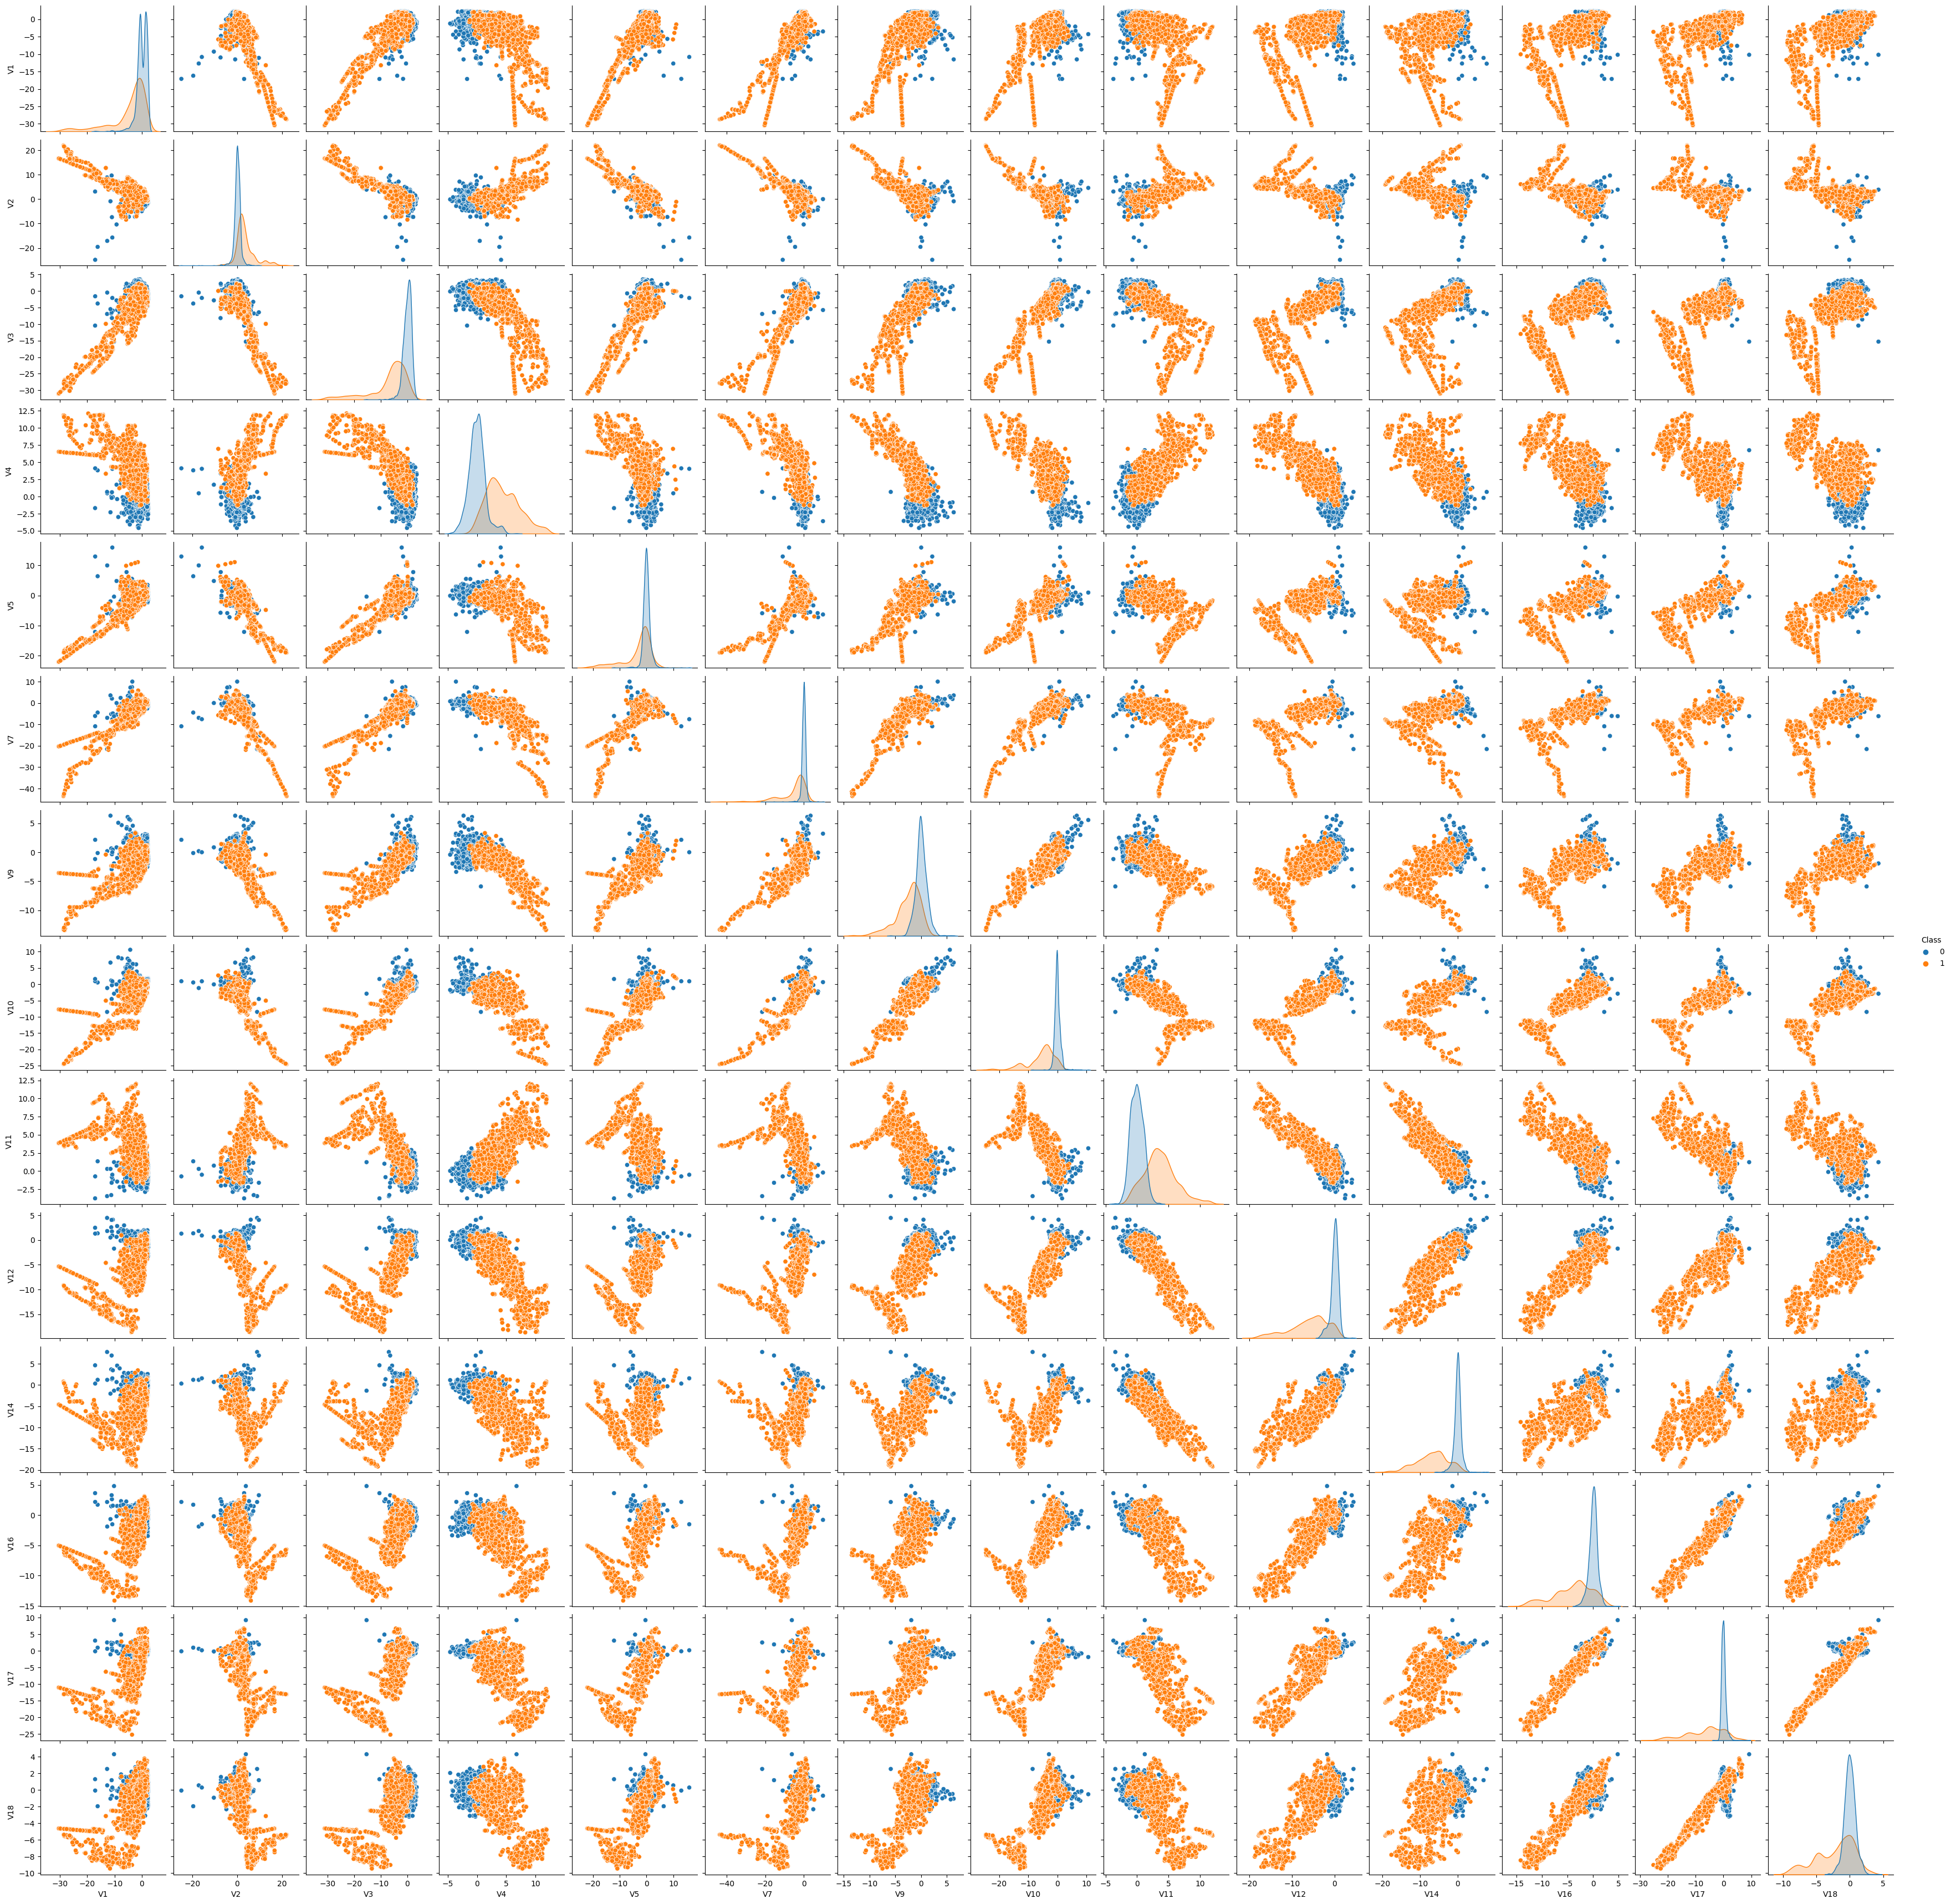

In [ ]:
sns.pairplot(df, hue="Class");

Nah... It seems normal transactions are clustered, so we're fine with 2k samples left

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(random_state=42)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

models

 97%|█████████▋| 28/29 [00:06<00:00,  5.86it/s]

[LightGBM] [Info] Number of positive: 1598, number of negative: 1602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499375 -> initscore=-0.002500
[LightGBM] [Info] Start training from score -0.002500


100%|██████████| 29/29 [00:06<00:00,  4.39it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.98               0.98     0.98      0.98   
LabelPropagation                   0.98               0.98     0.98      0.98   
LabelSpreading                     0.97               0.97     0.97      0.97   
RandomForestClassifier             0.97               0.97     0.97      0.97   
LGBMClassifier                     0.97               0.97     0.97      0.97   
XGBClassifier                      0.97               0.97     0.97      0.97   
KNeighborsClassifier               0.97               0.97     0.97      0.97   
BaggingClassifier                  0.96               0.96     0.96      0.96   
DecisionTreeClassifier             0.95               0.95     0.95      0.95   
ExtraTreeClassifier                0.94               0.94     0.94      0.94   
AdaBoostClassifier                 0.94               0.94     0.94      0.94   
SVC                                0.93               0.93     0.93      0.93   
SGDClassifier                      0.92               0.92     0.92      0.92   
CalibratedClassifierCV             0.92               0.92     0.92      0.92   
LinearSVC                          0.92               0.92     0.92      0.92   
LogisticRegression                 0.92               0.92     0.92      0.92   
PassiveAggressiveClassifier        0.92               0.92     0.92      0.92   
Perceptron                         0.91               0.91     0.91      0.91   
QuadraticDiscriminantAnalysis      0.91               0.91     0.91      0.91   
RidgeClassifierCV                  0.90               0.90     0.90      0.90   
RidgeClassifier                    0.90               0.90     0.90      0.90   
LinearDiscriminantAnalysis         0.90               0.90     0.90      0.90   
GaussianNB                         0.90               0.90     0.90      0.89   
NuSVC                              0.89               0.89     0.89      0.89   
BernoulliNB                        0.89               0.89     0.89      0.89   
NearestCentroid                    0.86               0.87     0.87      0.86   
DummyClassifier                    0.50               0.50     0.50      0.33   

                               Time Taken  
Model                                      
ExtraTreesClassifier                 0.34  
LabelPropagation                     0.67  
LabelSpreading                       0.91  
RandomForestClassifier               0.86  
LGBMClassifier                       0.24  
XGBClassifier                        0.21  
KNeighborsClassifier                 0.08  
BaggingClassifier                    0.29  
DecisionTreeClassifier               0.11  
ExtraTreeClassifier                  0.02  
AdaBoostClassifier                   0.49  
SVC                                  0.19  
SGDClassifier                        0.12  
CalibratedClassifierCV               0.46  
LinearSVC                            0.21  
LogisticRegression                   0.12  
PassiveAggressiveClassifier          0.06  
Perceptron                           0.10  
QuadraticDiscriminantAnalysis        0.08  
RidgeClassifierCV                    0.14  
RidgeClassifier                      0.08  
LinearDiscriminantAnalysis           0.14  
GaussianNB                           0.02  
NuSVC                                0.47  
BernoulliNB                          0.02  
NearestCentroid                      0.06  
DummyClassifier                      0.02

LEEET'S GOOOO!!!! 98% Accuracy and F1 on RandomForest!<br>
Let's try tuning this baby!<br>
<img src="https://m.media-amazon.com/images/S/pv-target-images/535d17f12fd5cfa95b3392433d51675fcef74d1bd92662c5c89d371dc5b4161c.jpg" width=50%>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df_og

V1    V2    V3    V4    V5    V7    V9   V10   V11   V12   V14  \
0       -1.36 -0.07  2.54  1.38 -0.34  0.24  0.36  0.09 -0.55 -0.62 -0.31   
1        1.19  0.27  0.17  0.45  0.06 -0.08 -0.26 -0.17  1.61  1.07 -0.14   
2       -1.36 -1.34  1.77  0.38 -0.50  0.79 -1.51  0.21  0.62  0.07 -0.17   
3       -0.97 -0.19  1.79 -0.86 -0.01  0.24 -1.39 -0.05 -0.23  0.18 -0.29   
4       -1.16  0.88  1.55  0.40 -0.41  0.59  0.82  0.75 -0.82  0.54 -1.12   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
284802 -11.88 10.07 -9.83 -2.07 -5.36 -4.92  1.91  4.36 -1.59  2.71  4.63   
284803  -0.73 -0.06  2.04 -0.74  0.87  0.02  0.58 -0.98 -0.15  0.92 -0.68   
284804   1.92 -0.30 -3.25 -0.56  2.63 -0.30  0.43 -0.48  0.41  0.06 -0.51   
284805  -0.24  0.53  0.70  0.69 -0.38 -0.69  0.39 -0.40 -1.93 -0.96  0.45   
284806  -0.53 -0.19  0.70 -0.51 -0.01  1.58  0.49 -0.92 -1.04 -0.03 -0.08   

         V16   V17   V18  Class  
0      -0.47  0.21  0.03      0  
1       0.46 -0.11 -0.18      0  
2      -2.89  1.11 -0.12      0  
3      -1.06 -0.68  1.97      0  
4      -0.45 -0.24 -0.04      0  
...      ...   ...   ...    ...  
284802  1.11  1.99  0.51      0  
284803 -0.71 -0.03 -1.22      0  
284804  0.14  0.31  0.40      0  
284805 -0.61  0.51  1.11      0  
284806 -0.30 -0.66  0.17      0  

[284807 rows x 15 columns]

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [ ]:
models = {
    'RF': RandomForestClassifier(),
    'ExtraTrees': ExtraTreesClassifier(),
    'XGB': XGBClassifier()
}


f1_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    f1_scores[name] = f1_score(y_test, y_pred, pos_label=1)

print("F1 Scores for class == 1:")
for name, score in f1_scores.items():
    print(f"{name}: {score:.4f}")

F1 Scores for class == 1:
RF: 0.9682
ExtraTrees: 0.9747
XGB: 0.9711


In [ ]:
extra_trees = ExtraTreesClassifier()

In [ ]:
grid = {
    "n_estimators": range(90, 110, 2),
    "criterion": ["gini", "entropy", "log_loss"]
}

best_trees = GridSearchCV(extra_trees, grid, cv=3)
best_trees.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': range(90, 110, 2)})

In [ ]:
best_trees.score(X_test, y_test)

0.9775

Not really improved

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
extra_trees = ExtraTreesClassifier()
xgb = XGBClassifier()
rf = RandomForestClassifier()

In [ ]:
voting_clf = VotingClassifier(estimators=[
    ("Trees", extra_trees),
    ("RF", rf),
    ("XGB", xgb)
    ],
    voting="soft"
)

In [ ]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('Trees', ExtraTreesClassifier()),
                             ('RF', RandomForestClassifier()),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=N...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [ ]:
y_pred = voting_clf.predict(X_test)
print(f1_score(y_test, y_pred))

0.9722222222222222


I got 98.5 % accuracy on previous sample and 0.97 here (because sample changed,other models perform better, but I still use old ones, so...)<br>

# **Peak Performance:** <br>
# **98.5%**<br>
<img src="https://media1.tenor.com/m/ZGWn1cv5YkMAAAAd/di-caprio-dance.gif" width=40%%><br>